In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_squared_error,accuracy_score,mean_squared_log_error,r2_score

In [3]:
import sklearn
sklearn.__version__

'0.21.3'

In [6]:
import os
os.getcwd()

'C:\\Users\\Dashang\\Downloads\\CreditConsumptionDataSet_2'

In [7]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

In [8]:
#basic statistical description of the train data
train.describe()

,ID,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,...,15000.000000,15000.000000,1.500000e+04,1.500000e+04,1.500000e+04,15000.000000,15000.000000,1.500000e+04,1.500000e+04,15000.000000
mean,10032.077067,47.790600,598.415467,17957.391719,8171.098287,1.633705e+04,7703.605203,12129.010832,7097.395321,41.488333,...,11.923133,40.996867,5.718791e+04,7.615987e+04,7.850316e+04,19.946400,44.647867,5.258654e+04,1.576040e+04,55157.729867
std,5760.372343,30.632766,220.062345,25187.939958,14773.029481,2.706085e+04,18987.296785,18488.781136,13251.695907,97.432251,...,16.843563,40.537354,2.000194e+05,1.545112e+05,1.482005e+05,27.200165,35.089082,1.282601e+05,1.179153e+05,97670.972252
min,1.000000,25.000000,123.000000,253.000000,19.350000,1.570000e+02,22.000000,65.000000,62.000000,1.000000,...,0.000000,0.000000,2.500000e-01,5.230000e+00,1.188000e+01,1.000000,0.000000,6.000000e-02,0.000000e+00,0.000000
25%,5060.500000,33.000000,424.000000,4411.027500,1634.000000,3.638000e+03,1643.500000,3004.500000,1358.750000,5.000000,...,2.000000,11.000000,2.008300e+04,2.573259e+04,2.492008e+04,4.000000,12.000000,1.903800e+04,1.548510e+03,6768.000000
50%,10054.000000,40.000000,623.000000,10288.100000,3996.900000,8.695030e+03,3820.500000,6655.250000,3327.000000,10.000000,...,4.000000,23.000000,3.140300e+04,4.580365e+04,4.590000e+04,7.000000,38.000000,3.042550e+04,3.954430e+03,13364.000000
75%,15015.250000,53.000000,799.000000,21405.000000,9339.020000,1.895130e+04,8212.000000,14247.000000,7597.000000,44.000000,...,11.000000,69.000000,5.598600e+04,8.461910e+04,8.559233e+04,21.000000,73.000000,5.321100e+04,9.376390e+03,20105.750000
max,19998.000000,223.000000,974.000000,441031.330000,229255.000000,1.117246e+06,911223.490000,382914.100000,233384.000000,531.000000,...,71.000000,171.000000,1.000000e+07,6.539810e+06,6.611953e+06,117.000000,133.000000,5.200000e+06,7.447125e+06,408382.000000


In [9]:
# see how many null values are there in percentage
train.isnull().sum()/train.shape[0] *100 

ID                       0.0
account_type             0.0
gender                   0.0
age                      0.0
region_code              0.0
cc_cons_apr              0.0
dc_cons_apr              0.0
cc_cons_may              0.0
dc_cons_may              0.0
cc_cons_jun              0.0
dc_cons_jun              0.0
cc_count_apr             0.0
cc_count_may             0.0
cc_count_jun             0.0
dc_count_apr             0.0
dc_count_may             0.0
dc_count_jun             0.0
card_lim                 0.0
personal_loan_active     0.0
vehicle_loan_active      0.0
personal_loan_closed     0.0
vehicle_loan_closed      0.0
investment_1             0.0
investment_2             0.0
investment_3             0.0
investment_4             0.0
debit_amount_apr         0.0
credit_amount_apr        0.0
debit_count_apr          0.0
credit_count_apr         0.0
max_credit_amount_apr    0.0
debit_amount_may         0.0
credit_amount_may        0.0
credit_count_may         0.0
debit_count_ma

In [10]:
# Adaptive binning on 'Age' using quantiles
quantile_list = [0, .25, .5, .75, 1.]
quantiles = train['age'].quantile(quantile_list)
quantile_labels = ['22-30', '31-34', '35-39', '> 40']
train['age_group'] = pd.qcut(train['age'], q=quantile_list, labels=quantile_labels)
train.head()

,ID,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons,age_group
0,12554,current,M,35,708,24893.00,378.00,10288.00,29664.00,16291.40,...,24563.0,30051.32,12761.0,2.0,65.0,50836.0,Y,1674.09,20014.0,31-34
1,17645,current,M,35,123,18941.62,966.00,20672.00,287.00,4217.00,...,23948.0,42119.05,76206.0,21.0,63.0,23226.0,Y,13043.34,10173.0,31-34
2,7604,current,M,55,802,5678.87,2724.00,1964.50,3933.11,23956.25,...,10752.0,58373.25,75283.0,7.0,1.0,27036.0,Y,25375.27,16095.0,> 40
3,1590,current,F,29,867,30489.50,1236.00,12609.88,9138.14,17521.00,...,12607.0,69851.51,68708.0,21.0,83.0,43037.0,Y,3544.33,7707.0,22-30
4,16556,current,M,34,802,7441.40,6906.04,4364.00,1939.00,2121.00,...,25213.0,10071.00,80140.0,8.0,32.0,32044.0,Y,12780.44,96408.0,31-34


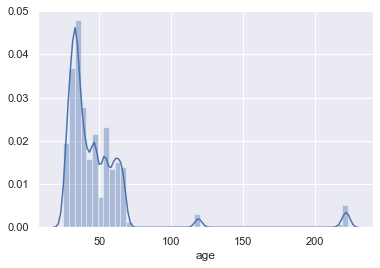

In [11]:
sns.distplot(train.age)

In [12]:
def detect_outliers(dataframe):
    cols = list(dataframe)
    outliers = pd.DataFrame(columns=['Feature','Number of Outliers'])
    
    for column in cols:
        if column in dataframe.select_dtypes(include=np.number).columns:
            q1 = dataframe[column].quantile(0.25) 
            q3 = dataframe[column].quantile(0.75)
            iqr = q3 - q1
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            outliers = outliers.append({'Feature':column,'Number of Outliers':dataframe.loc[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0]},ignore_index=True)
    return outliers

detect_outliers(train)

,Feature,Number of Outliers
0,ID,0
1,age,534
2,region_code,0
3,cc_cons_apr,1217
4,dc_cons_apr,1220
5,cc_cons_may,1202
6,dc_cons_may,1248
7,cc_cons_jun,1181
8,dc_cons_jun,1366
9,cc_count_apr,883


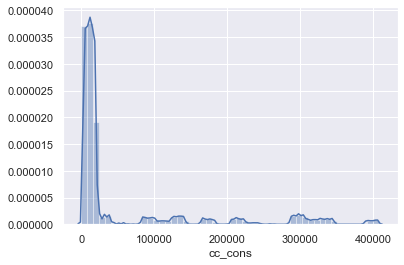

In [13]:
X = train.drop(columns=['ID','cc_cons','age','region_code'], axis=1)  
#removed age because we made age bin groups in the above code
#considering that the region code does not affect modelling
y = train['cc_cons']
y.skew()
sns.distplot(y)

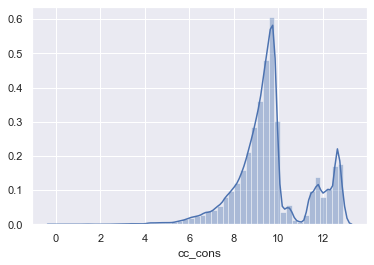

In [14]:
y = np.log1p(y)    #transfomed target variable because it was right skewed
X_cols = X.columns
sns.distplot(y)

In [15]:
# Split into categorical and numerical columns
num_cols = X.select_dtypes(exclude=['object','category']).columns
cat_cols = [i for i in X_cols if i not in X[num_cols].columns]
for i in cat_cols:
    X[i] = X[i].astype('category')

In [16]:
 # Function to treat outliers 
def treat_outliers(dataframe):
    cols = list(dataframe)
    for col in cols:
        if col in dataframe.select_dtypes(include=np.number).columns:
            dataframe[col] = winsorize(dataframe[col], limits=[0.1, 0.1],inclusive=(True, True))
    
    return dataframe    


X[num_cols] = treat_outliers(X[num_cols])

# Checking for outliers after applying winsorization
detect_outliers(X)

NameError: name 'winsorize' is not defined

In [34]:
#Label Encoding to be able to use categorical variables like age group in the regression eq
cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
le = LabelEncoder()
for i in cols:
    X[i] = le.fit_transform(X[i])


# Standardization
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=X_cols)

# Spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=72)

In [35]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Train RMSE:',np.sqrt(mean_squared_error(y_train, lr.predict(X_train))))
print('Test RMSE:',np.sqrt(mean_squared_error(y_test, lr.predict(X_test))));

Train RMSE: 1.6079711470608444
Test RMSE: 1.6145866876863075


In [41]:
def rmsle(actual_column, predicted_column):
    sum=0.0
    for x,y in zip(actual_column, predicted_column):
        if x<0 or y<0: #check for negative values. 
            continue
        p = np.log(y+1)
        r = np.log(x+1)
        sum = sum + (p - r)**2
    return (sum/len(predicted_column))**0.5

In [42]:
rmsle(y_test,y_pred)

0.15991574041090084

In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor ,RandomForestRegressor
from xgboost import XGBRegressor 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso

In [39]:
#Decision Trees

dt_reg = DecisionTreeRegressor(random_state=42)
param_grid = dict(max_depth=range(5,20), min_samples_split=range(50,200,10), min_samples_leaf=range(25,100,10), max_leaf_nodes=range(8,32,2), min_impurity_decrease=(0.3,1.0,0.1))
grid = RandomizedSearchCV(dt_reg, param_grid, scoring='neg_mean_squared_error', n_jobs=4, cv=5, random_state=33)
grid.fit(X_train,y_train);


print('Train RMSE:',np.sqrt(mean_squared_error(y_train, grid.best_estimator_.predict(X_train))))
print('Test RMSE:',np.sqrt(mean_squared_error(y_test, grid.best_estimator_.predict(X_test))));

Train RMSLE: 1.6104594729978934
Test RMSLE: 1.612352576965904


In [45]:
y_pred_dt = grid.best_estimator_.predict(X_test)
rmsle(y_test,y_pred_dt) 

0.15984808301412431

In [44]:
#random forest
rf_model = RandomForestRegressor(random_state=33)
param_grid = dict(n_estimators=range(10,100,10),max_depth=range(3,20),min_samples_split=range(50,500,20),min_samples_leaf=range(25,75,10),max_leaf_nodes=range(8,32,2))
grid = RandomizedSearchCV(rf_model,param_grid,scoring='neg_mean_squared_error',n_jobs=-1,cv=5,random_state=33)
grid.fit(X_train,y_train);


print('Train RMSLE:',np.sqrt(mean_squared_error(y_train, grid.best_estimator_.predict(X_train))))
print('Test RMSLE:',np.sqrt(mean_squared_error(y_test, grid.best_estimator_.predict(X_test))));

Train RMSLE: 1.600150710862556
Test RMSLE: 1.6133128734887003


In [46]:
y_pred_rf = grid.best_estimator_.predict(X_test)
rmsle(y_test,y_pred_rf)

0.15984808301412431

In [1]:
#feature selection
from sklearn.feature_selection import RFE

In [2]:
def feature_selection(predictors,target,number_of_features,model):

    models = model()
    rfe = RFE(models,number_of_features)
    rfe = rfe.fit(X,y)
    feature_ranking = pd.Series(rfe.ranking_, index=X.columns)
    plt.show()
    print('Features  to be selected for {} are:'.format(str(i[0])))
    print(feature_ranking[feature_ranking.values==1].index.tolist())
    print('===='*30)

In [52]:
# Choosing the models. If you want to specify additional models, kindly specify them as a key-value pair as shown below.
models = {'Random Forest':RandomForestRegressor}
# Selecting 8 number of features
for i in models.items():
    feature_selection(X,y,15,i[1])

Features  to be selected for Random Forest are:
['cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun', 'debit_amount_apr', 'credit_amount_apr', 'max_credit_amount_apr', 'debit_amount_may', 'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun', 'max_credit_amount_jun', 'emi_active']


In [53]:
X_train = X_train[['cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun', 'debit_amount_apr', 'credit_amount_apr', 'max_credit_amount_apr', 'debit_amount_may', 'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun', 'max_credit_amount_jun', 'emi_active']]
X_test = X_test[['cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun', 'debit_amount_apr', 'credit_amount_apr', 'max_credit_amount_apr', 'debit_amount_may', 'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun', 'max_credit_amount_jun', 'emi_active']]

rf_model=RandomForestRegressor(random_state=72)
param_grid=dict(n_estimators=range(10,100,10),max_depth=range(3,20),min_samples_split=range(50,500,20),min_samples_leaf=range(25,75,10),max_leaf_nodes=range(8,32,2))
grid=RandomizedSearchCV(rf_model,param_grid,scoring='neg_mean_squared_error',n_jobs=-1,cv=5,random_state=33)
grid.fit(X_train,y_train);

print('Train RMSE:',np.sqrt(mean_squared_error(y_train, grid.best_estimator_.predict(X_train))))
print('Test RMSE:',np.sqrt(mean_squared_error(y_test, grid.best_estimator_.predict(X_test))));

Train RMSE: 1.6015905171958393
Test RMSE: 1.6132438362783748


In [54]:
import pandas as pd
test_df = pd.read_csv('./Test.csv')
id_col = test_df['ID']


quantiles = test_df['age'].quantile(quantile_list)
test_df['age_group'] = pd.qcut(test_df['age'], q=quantile_list, labels=quantile_labels)

In [55]:
test_df.head()

,ID,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,age_group
0,17591,current,M,37,575,2795.45,1290.0,6141.05,676.50,9146.10,...,20.0,9750.0,30527.88,31271.00,3.0,12.0,25945.92,Y,1170.49,31-34
1,13541,current,M,33,394,29405.13,1640.0,1670.00,2463.92,10947.50,...,40.0,16967.0,14342.83,16582.00,6.0,39.0,12214.00,Y,16447.45,22-30
2,13431,current,M,53,324,5985.20,6189.0,2696.09,766.00,716.00,...,35.0,36398.0,32503.16,33539.54,5.0,9.0,13215.00,Y,2622.28,35-39
3,8687,current,M,33,370,2105.93,18225.0,34763.56,167.00,4260.27,...,5.0,97825.0,93572.42,109429.75,21.0,0.0,72317.00,Y,340.79,22-30
4,14727,current,M,62,505,3269.00,3532.0,3158.40,2699.77,3373.48,...,75.0,27936.0,19011.50,41401.00,6.0,35.0,42344.00,Y,2812.20,> 40


In [56]:
test_df.isnull().sum()/test_df.shape[0] *100  

ID                       0.0
account_type             0.0
gender                   0.0
age                      0.0
region_code              0.0
cc_cons_apr              0.0
dc_cons_apr              0.0
cc_cons_may              0.0
dc_cons_may              0.0
cc_cons_jun              0.0
dc_cons_jun              0.0
cc_count_apr             0.0
cc_count_may             0.0
cc_count_jun             0.0
dc_count_apr             0.0
dc_count_may             0.0
dc_count_jun             0.0
card_lim                 0.0
personal_loan_active     0.0
vehicle_loan_active      0.0
personal_loan_closed     0.0
vehicle_loan_closed      0.0
investment_1             0.0
investment_2             0.0
investment_3             0.0
investment_4             0.0
debit_amount_apr         0.0
credit_amount_apr        0.0
debit_count_apr          0.0
credit_count_apr         0.0
max_credit_amount_apr    0.0
debit_amount_may         0.0
credit_amount_may        0.0
credit_count_may         0.0
debit_count_ma

In [57]:
test_df.drop(columns=['ID','age','region_code'], axis=1, inplace=True)

In [58]:
cols = test_df.select_dtypes(include=['object', 'category']).columns.tolist()
le = LabelEncoder()
for i in cols:
    test_df[i] = le.fit_transform(test_df[i])


#Scaling
test_df_cols = test_df.columns
test_df = scaler.transform(test_df)
test_df = pd.DataFrame(test_df, columns=test_df_cols)

In [59]:
cols

['account_type', 'gender', 'loan_enq', 'age_group']

In [60]:
#Predicting on Test using random forest best features and best parameters
test_df = test_df[['cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun', 'debit_amount_apr', 'credit_amount_apr', 'max_credit_amount_apr', 'debit_amount_may', 'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun', 'max_credit_amount_jun', 'emi_active']]
test_df['cc_cons'] = grid.predict(test_df) 
test_df['cc_cons'] = np.exp(test_df['cc_cons'])-1

In [62]:
#Creating Final Submission file
submissions_5 = pd.concat([id_col, test_df['cc_cons']], axis=1)
submissions_5.to_csv('submission.csv', index=False)
submissions_5

,ID,cc_cons
0,17591,14559.231502
1,13541,15724.481026
2,13431,15382.381053
3,8687,14971.430611
4,14727,13972.638388
5,14988,14324.999043
6,14859,14715.318777
7,16636,15601.239868
8,7625,15361.606133
9,16492,15016.186884


In [61]:
test_df.head()

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,debit_amount_apr,credit_amount_apr,max_credit_amount_apr,debit_amount_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,max_credit_amount_jun,emi_active,cc_cons
0,-0.939038,-0.855148,-0.592888,-0.997916,-0.066512,2.089478,-0.667748,-0.391874,-0.628271,-0.723050,-1.114075,-0.679229,-0.650434,-0.510799,-0.835967,14559.231502
1,1.166006,-0.794416,-0.986675,-0.637607,0.150116,-0.868525,-0.554038,-0.896131,-1.447000,-0.933499,-0.864805,-1.049620,-0.967884,-1.005682,1.608971,15724.481026
2,-0.686703,-0.005079,-0.896302,-0.979874,-1.080277,-0.221398,0.210263,-0.565803,-0.998076,2.015881,-0.193670,-0.634026,-0.601408,-0.969607,-0.603622,15382.381053
3,-0.993585,2.083393,1.928038,-1.100621,-0.654060,3.047983,-0.376184,-0.418165,7.569065,1.171099,1.927979,0.763528,1.038685,1.160361,-0.968753,14971.430611
4,-0.901577,-0.466119,-0.855584,-0.590064,-0.760701,-0.020414,-1.130204,-1.047306,-1.015722,3.426179,-0.485942,-0.942779,-0.431511,0.080169,-0.573227,13972.638388
